# MENTAL HEALTH PREDICTION
Can we predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset?<br>
---Biyatra Ghosh,Tapabrata Roy,Harsha Pati

# INDEX
- 1.Import Libraries
- 2.Loading & Reading The Dataset
- 3.Data Cleaning
- 4.Visualization Depending On Country
- 5.Data Encoding
- 6.Covariance Matrix
- 7.EDA
- 8.Scaling & Spliting
- 9.Tuning
- 10.Modelling
- 11.Predict With Neural Network
- 12.Modelling Success Method Plot
- 13.Optuna Hyperparameter Tuning On Best Fit Model
- 14.Generate Prediction From The Model
- 15.Creating Predictions On Test Set

# 1.Import Libraries

- Installed Module-Mlxtend,Tensorflow,Optuna,Plotly

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import randint

import warnings
warnings.filterwarnings(action='ignore')

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,binarize
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

# 2.Load Dataset & Information about dataset

In [2]:
# Load Dataset
df = pd.read_csv("E:\\6.My Project\\8th Sem Prj\\survey.csv")
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# Check the shape of dataset
df.shape

(1259, 27)

In [4]:
# Distribution of data
df.describe()


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
# Information of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
# Check the columns name
df.columns


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
# Check the null values columns
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

In [8]:
df.dtypes


Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

# 3.Data Cleaning
- 3.1) Clean NaN Value
- 3.2)Display the Number of Duplicate Rows & Drop
- 3.3)Clean Gender Column
- 3.4)Clean Age Column & Create age_range
- 3.5)Clean self_employed Column
- 3.6)Clean wrok_interfere Column

In [9]:
# Eliminate 3 Cols:Comments,State,Timestamp
df = df.drop(['comments'], axis=1)
df = df.drop(['state'], axis=1)
df = df.drop(['Timestamp'], axis=1)
# Update dataset
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [10]:
df.isnull().sum()


Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

3.1. Clean NaN Value

In [11]:
# Cleaning NaN Value
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

intFeatures = ['Age']
stringFeatures = ['Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere','Country',
                  'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                  'phys_health_consquence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                  'mental_vs_physical', 'obs_consequence', 'benfits', 'care_options', 'wellness_program', 'seek_help']
floatFeature = []


for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeature:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print("Error: Feature %s not recognized." % feature)


Error: Feature benefits not recognized.
Error: Feature phys_health_consequence not recognized.


In [12]:
# After cleaning the update dataset
df.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


3.2.Display the Number of Duplicate Rows & Drop

In [13]:
df.duplicated(keep='first').sum()


4

In [14]:
# Drop all the Duplicate Rows
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [15]:
df.duplicated(keep='first').sum()


0

In [16]:
df.shape

(1255, 24)

3.3. Clean Gender Column

In [17]:
# Convert all cases to lower cases
gender = df['Gender'].str.lower()


# select unique elements
gender = df['Gender'].unique()

# make gender group
male = ['male ', 'm', 'male-ish', 'maile', 'mal',
        'male (cis)', 'make', 'man', 'msle', 'mail', 'malr', 'Cis Male', 'cis male', 'cis man', 'male']
trans = ['trans-female', 'something kinda male?', 'queer/she/they', 'non-binary', 'nah', 'all', 'enby', 'fluid',
         'genderqueer', 'androgyne', 'agender', 'male leaning androgynous', 'guy (-ish) ^_^', 'trans woman',
         'neuter', 'female (trans)', 'queer', 'ostensibly male, unsure what that really means']
female = ['cis female', 'f', 'female ', 'woman', 'femake',
          'female', 'cis-female/femme', 'female (cis)', 'femail']

for (row, col) in df.iterrows():
    if str.lower(col.Gender) in male:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if str.lower(col.Gender) in female:
        df['Gender'].replace(to_replace=col.Gender,
                             value='female', inplace=True)
    if str.lower(col.Gender) in trans:
        df['Gender'].replace(to_replace=col.Gender,
                             value='transgender', inplace=True)

stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())


['female' 'male' 'transgender']


In [18]:
df['Gender'].value_counts()

male           987
female         247
transgender     19
Name: Gender, dtype: int64

In [19]:
df['Country'].value_counts()

United States             750
United Kingdom            184
Canada                     72
Germany                    45
Ireland                    27
Netherlands                26
Australia                  21
France                     13
India                      10
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
New Zealand                 7
Belgium                     6
Brazil                      6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Mexico                      3
Austria                     3
Finland                     3
Greece                      2
Colombia                    2
Portugal                    2
Croatia                     2
Georgia                     1
Moldova                     1
Nigeria                     1
Denmark                     1
China                       1
Thailand  

3.4. Age Column & Create "age_range" column

In [20]:
#Complete the missing age with mean
df['Age'].fillna(df['Age'].median(),inplace=True)

In [21]:
s=pd.Series(df['Age'])
s[s<18]=df['Age'].median()
df['Age']=s
s=pd.Series(df['Age'])
s[s>80]=df['Age'].median()
df['Age']=s
#Age Range
df['age_range']=pd.cut(df['Age'],[11,21,31,41,51,61,71,80],labels=["11-20","21-30","31-40","41-50","51-60","61-70","71-80"],include_lowest=True)

In [22]:
# Check the age_range column whether it it added or not
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-40
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,41-50
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-40
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,21-30
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,21-30


3.5.Clean the  self employed column(0.014 % NaN value).
change all NaN(NA) value to No

In [23]:
defaultString = 'NaN'
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


3.6.Clean the work_interfere column.
Chagne all NaN value to Don't Know

In [24]:
defaultString = 'NaN'
df['work_interfere'] = df['work_interfere'].replace(
    [defaultString], 'Don\'t know')
print(df['work_interfere'].unique())


['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


### DATA FOR BACKEND

In [25]:
# # Data for prediction in backend
# prediction_backenddata = ['work_interfere', 'family_history', 'care_options', 'benefits',
#                 'obs_consequence', 'anonymity', 'mental_health_interview', 'wellness_program','seek_help']
# PBD = df[prediction_backenddata]
# PBD.to_csv('E:\\6.My Project\\8th Sem Prj\\Backend\\Prediction_Backend_Data.csv', index=False)

In [26]:
# # Data for visualization in backend
# visualization_backenddata = ['Gender','Country','treatment']
# VBD = df[visualization_backenddata]
# VBD.to_csv('E:\\6.My Project\\8th Sem Prj\\Backend\\Visualization_Backend_Data.csv', index=False)

# 4.Visualization Depending On Country

In [27]:
lst = list(df.Country.unique())


def treatmentVisualisation():
    while True:
        u = input("Choose one of the following Options :-\n\n1. If you want to visualize whether Treatement is done or not in every Country 'W'\n2. If you want to visualize whether Treatement is done or not for a perticular Country press 'C'\n3.If you don't want to Continue Press 'N'\n")
        if u == 'W' or u == 'w':
            plt.figure(figsize=(5, 8))
            g = sns.countplot(x="treatment", data=df)
            plt.title('Total Distribuition of People treated or not')
            plt.show()
        elif u == 'C' or u == 'c':
            c = input("Enter The Country Name:- ")
            if c in lst:
                data = pd.DataFrame(df.loc[df['Country'] == c])
                sns.countplot(x='treatment', data=data, palette="YlOrBr")
                plt.xlabel(c)
                plt.ylabel("Number of Person")
                plt.title(f'Treatement plot for {c}')
                plt.show()
            else:
                print("Enter the Country name correctly")
        elif u == 'N' or u == 'n':
            break
        else:
            print("Sorry!! Wrong Input Try Again")
        rep = input("Do you want to Continue:-\n\n1. If Yes prees 'Y'\n2. If No press 'N'\n\n")
        if rep == 'N' or rep == 'n':
            break
        elif rep == 'y' or rep == 'Y':
            continue
        else:
            print("Sorry!! Invalid Input")


treatmentVisualisation()


# 5.Data Encoding

In [28]:
LabelDict={}
for feature in df:
    le=preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
    df[feature]=le.transform(df[feature])
    
    lKey='label_'+feature
    lValue=[*le_name_mapping]
    LabelDict[lKey]=lValue
    
for key,value in LabelDict.items():
    print(key,value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'transgender']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_

In [86]:
# import pickle

# # Assume encoder is a trained encoder object
# with open('Final_Encoder.pkl', 'wb') as f:
#     pickle.dump(le, f)


In [29]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,44,0,0,1,2,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,0,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,3
2,14,1,6,0,0,0,3,4,0,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,43,0,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,1
4,13,1,44,0,0,0,1,1,1,1,...,0,1,1,1,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,43,0,0,1,0,2,0,1,...,2,1,1,1,1,1,1,0,0,1
1255,14,1,44,0,1,1,2,2,1,1,...,1,1,1,1,2,1,1,2,0,2
1256,16,1,44,0,1,1,4,5,0,1,...,1,2,2,0,0,1,1,1,0,2
1257,28,0,44,0,0,0,0,1,1,1,...,0,2,1,0,0,1,1,1,0,3


In [30]:
total = df.isnull().sum().sort_values(ascending=False)
print(total)

Age                          0
seek_help                    0
obs_consequence              0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
wellness_program             0
Gender                       0
care_options                 0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
Country                      0
age_range                    0
dtype: int64


# 6.Covariance Matrix. Variability comparison between categories of variables

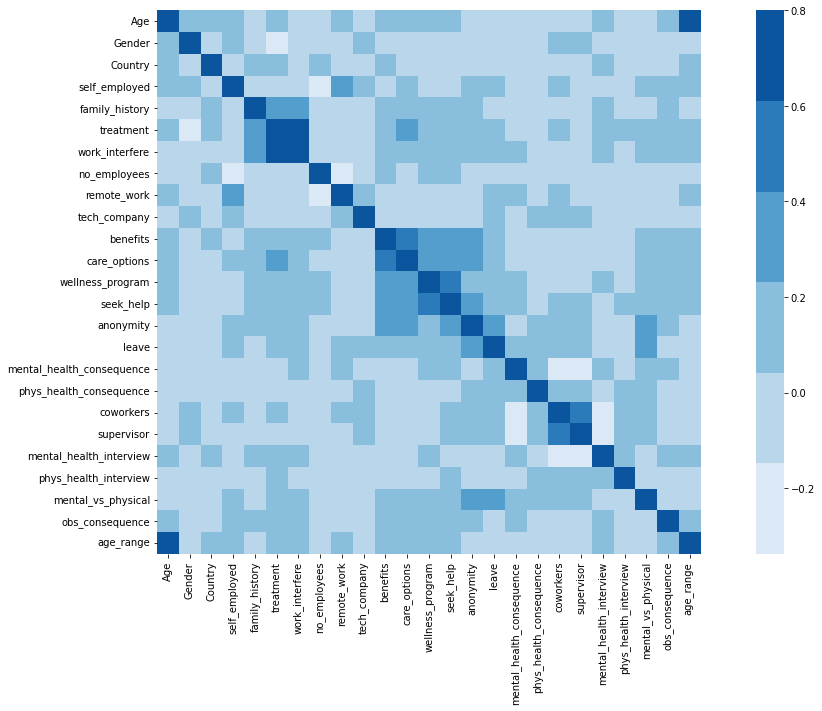

In [31]:
corrmatx = df.corr()
f = plt.subplots(figsize=(20, 10))
colormap = sns.color_palette("Blues")
sns.heatmap(corrmatx, vmax=.8, square=True, cmap=colormap)
plt.show()


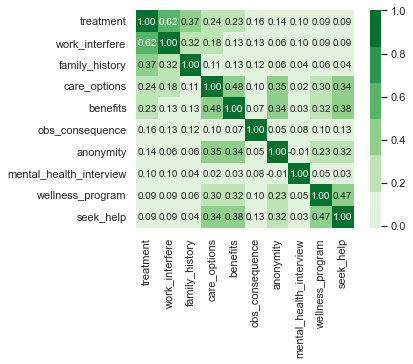

In [32]:
k = 10
cols = corrmatx.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
colormap = sns.color_palette("Greens")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
                 'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap=colormap)
plt.show()


# 7.EDA
- 7.1)Showing All Data Relationship
- 7.2)Distribution & Density by Age
- 7.3)Separate by treatment
- 7.4)No of People treated
- 7.5)Draw A Barplot to Show Probabilities For Class & Sex
- 7.6)Draw A Barplot to Show Probabilities For family_history
- 7.7)Draw A Barplot to Show Probabilities For care_options
- 7.8)Draw A Barplot to Show Probabilities For benefits
- 7.9)Draw A Barplot to Show Probabilities For work_interfere
- 7.10)Draw A Barplot to Show Probabilities For anonymity
- 7.11)Draw A Barplot to Show Probabilities For leave
- 7.12)Draw A Barplot to Show Probabilities For self_employed

7.1.Showing All data relationship

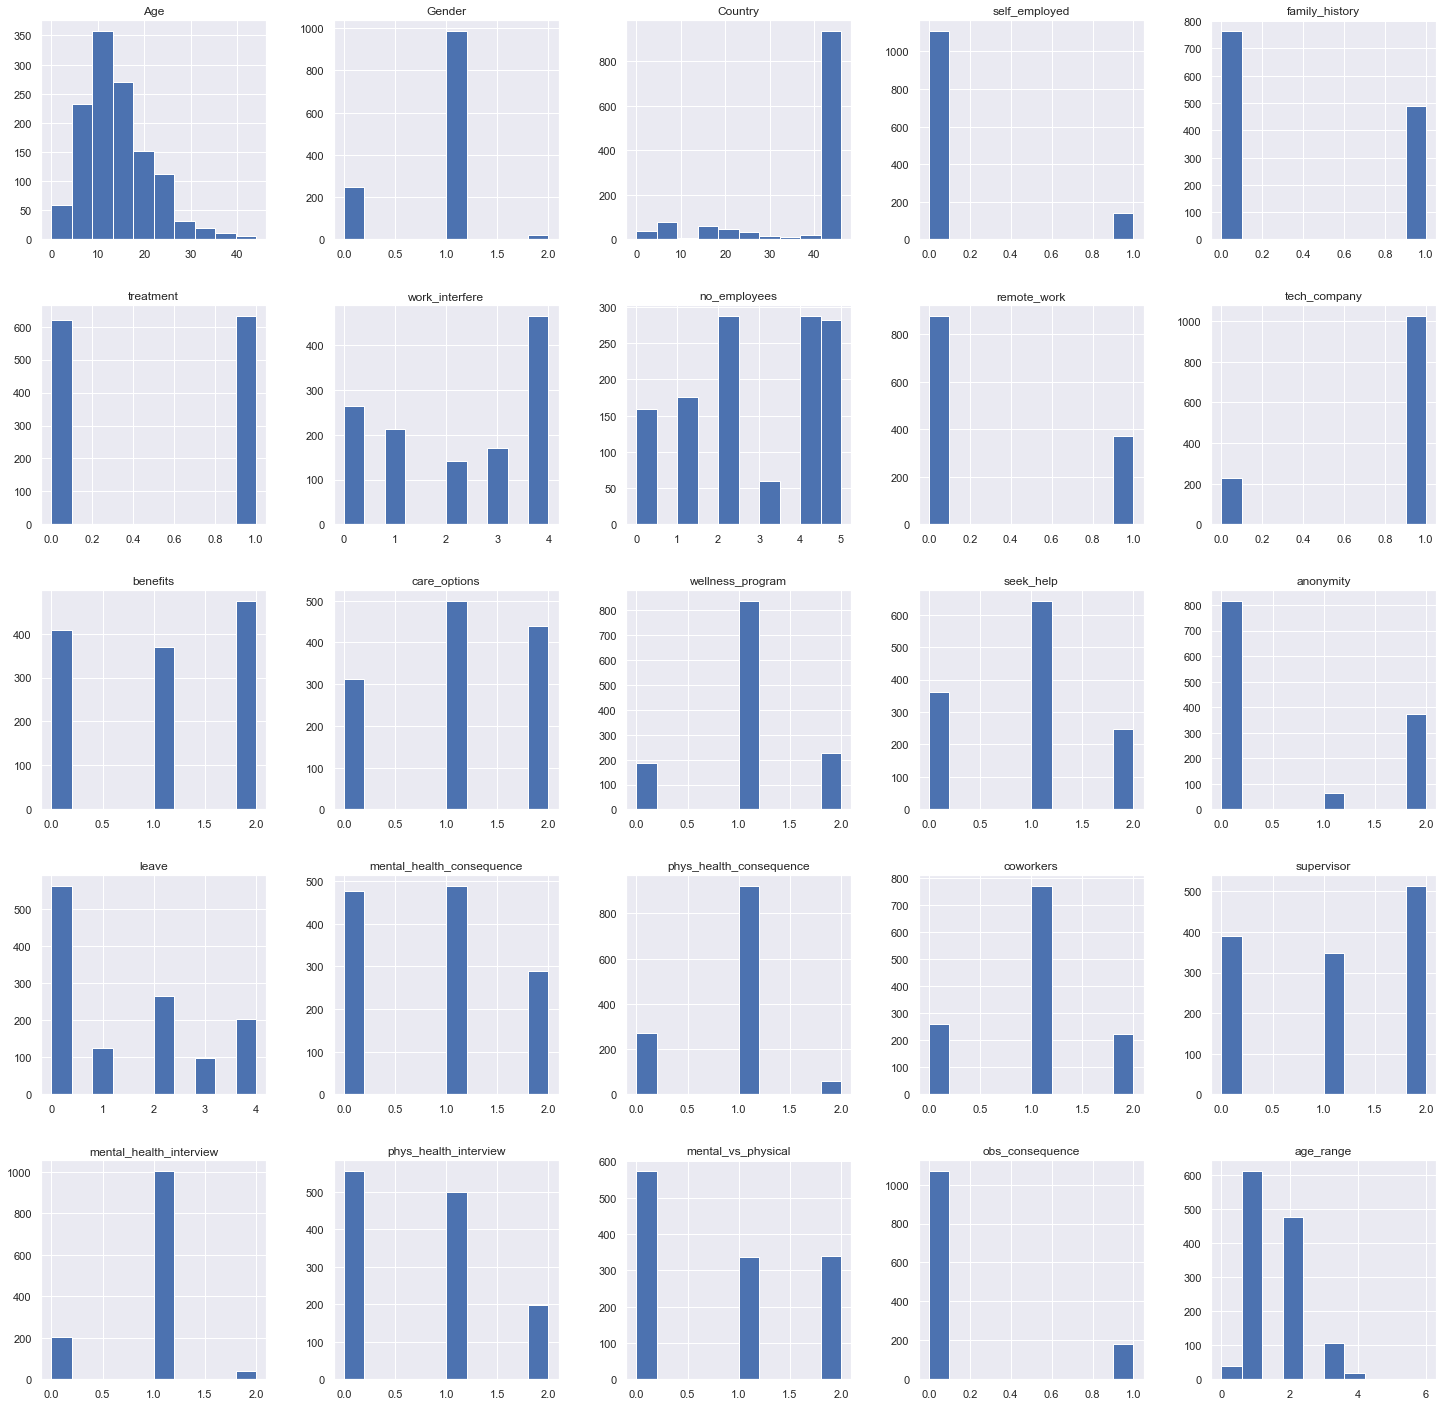

In [33]:
df.hist(figsize=(25, 25))
plt.show()

7.2.Distribution & Density by Age

Text(0.5, 0, 'Age')

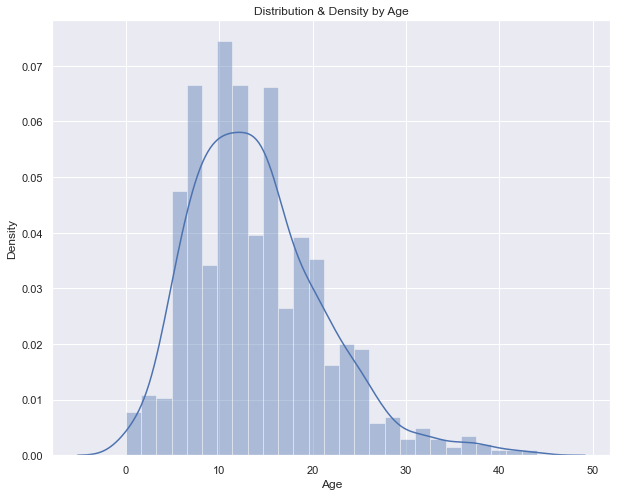

In [34]:
plt.figure(figsize=(10, 8))
sns.distplot(df['Age'], bins=None)
plt.title("Distribution & Density by Age")
plt.xlabel('Age')

7.3.Separate by treatment

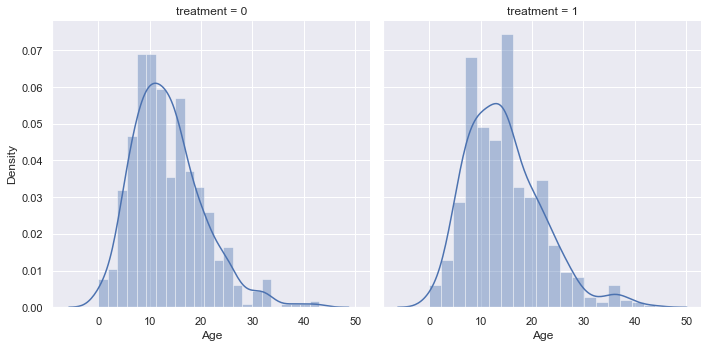

In [35]:
g = sns.FacetGrid(df, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

7.4.No of people treated

Text(0.5, 1.0, 'Total Distribuition by treated or not')

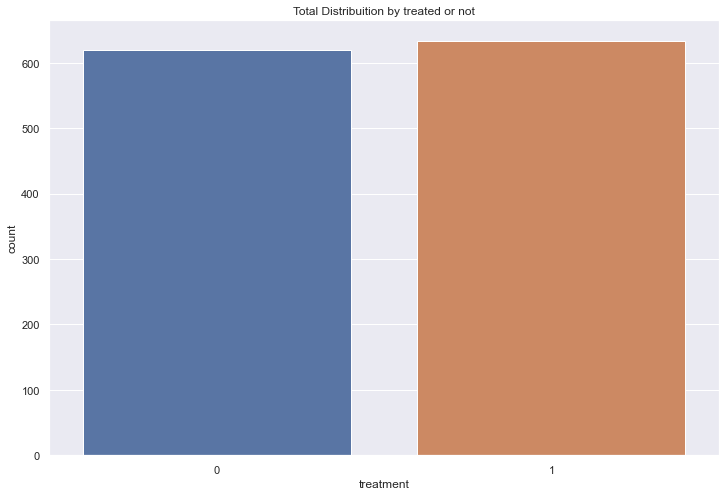

In [36]:
plt.figure(figsize=(12, 8))
g = sns.countplot(x="treatment", data=df)
plt.title('Total Distribuition by treated or not')


7.5.Draw a barplot to show probabilities for class and sex

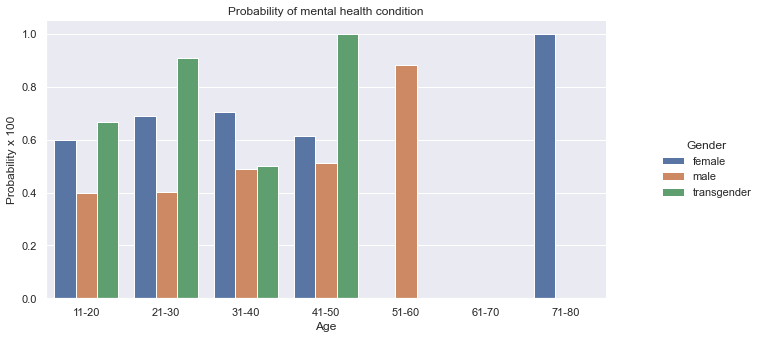

In [37]:
o = LabelDict['label_age_range']
g = sns.factorplot(x="age_range", y="treatment", hue="Gender",
                   data=df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title("Probability of mental health condition")
plt.ylabel('Probability x 100')
plt.xlabel('Age')

new_labels = LabelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


7.6.Draw a barplot to show probabilities for family history

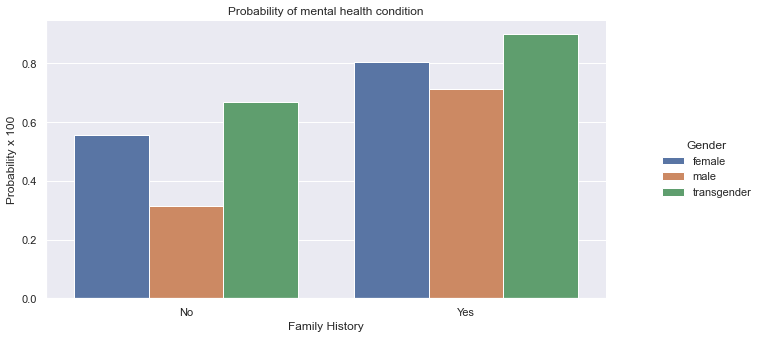

In [38]:
o = LabelDict['label_family_history']
g = sns.factorplot(x="family_history", y="treatment", hue="Gender",
                   data=df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title("Probability of mental health condition")
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

new_labels = LabelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


7.7.Draw a barplot to show probabilities for care option

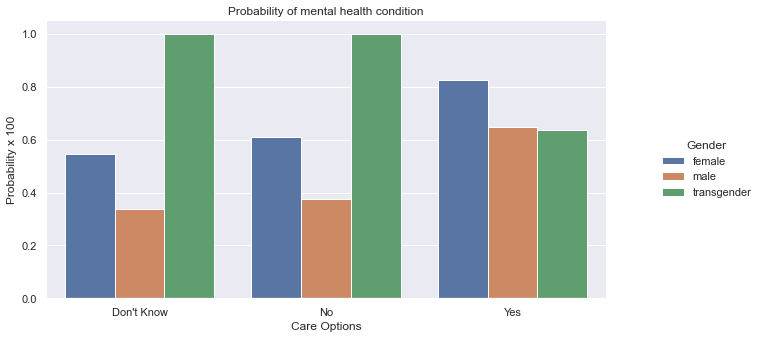

In [39]:
o = LabelDict['label_care_options']
g = sns.factorplot(x="care_options", y="treatment", hue="Gender",
                   data=df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title("Probability of mental health condition")
plt.ylabel('Probability x 100')
plt.xlabel('Care Options')

new_labels = LabelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


7.8.Draw a barplot to show probabilities for benefits

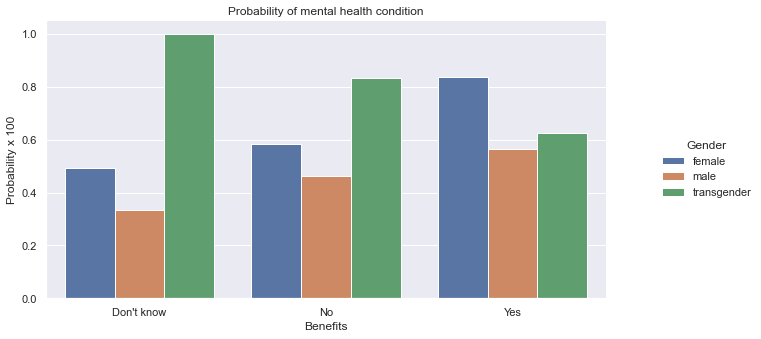

In [40]:
o = LabelDict['label_benefits']
g = sns.factorplot(x="benefits", y="treatment", hue="Gender",
                   data=df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title("Probability of mental health condition")
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

new_labels = LabelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


7.9.Draw a barplot to show probabilities for work_interfere

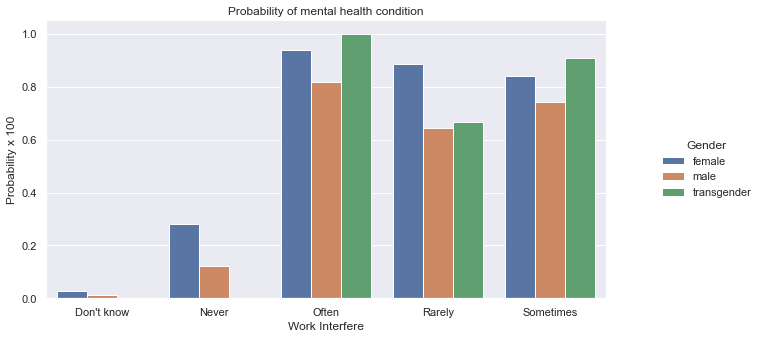

In [41]:
o = LabelDict['label_work_interfere']
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender",
                   data=df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title("Probability of mental health condition")
plt.ylabel('Probability x 100')
plt.xlabel('Work Interfere')

new_labels = LabelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


7.10.Draw a barplot to show probabilities for anonymity

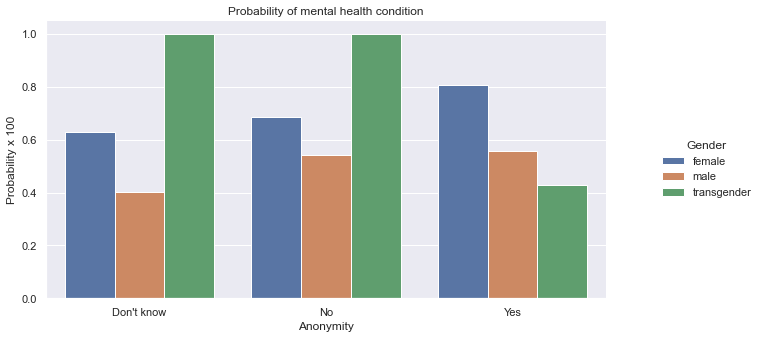

In [42]:
o = LabelDict['label_anonymity']
g = sns.factorplot(x="anonymity", y="treatment", hue="Gender",
                   data=df, kind="bar", ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title("Probability of mental health condition")
plt.ylabel('Probability x 100')
plt.xlabel('Anonymity')

new_labels = LabelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


7.11.Draw a barplot to show probabilities for leave

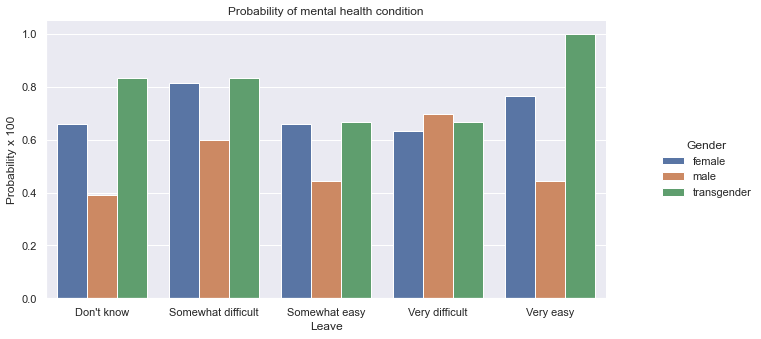

In [43]:
o = LabelDict['label_leave']
g = sns.factorplot(x="leave", y="treatment", hue="Gender", data=df,
                   kind="bar", ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title("Probability of mental health condition")
plt.ylabel('Probability x 100')
plt.xlabel('Leave')

new_labels = LabelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


7.12.Draw a barplot to show probabilities for self_employed

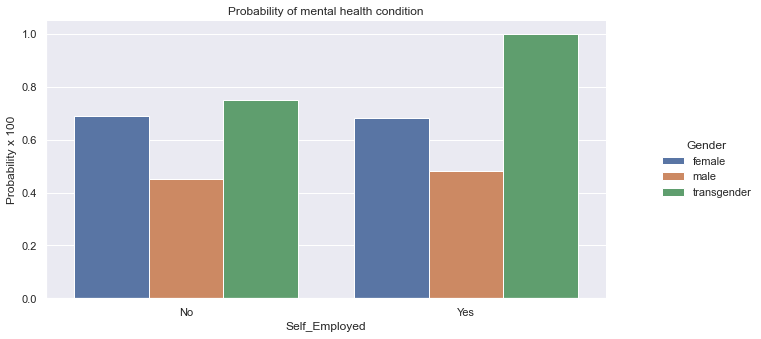

In [44]:
o = LabelDict['label_self_employed']
g = sns.factorplot(x="self_employed", y="treatment", hue="Gender", data=df,
                   kind="bar", ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title("Probability of mental health condition")
plt.ylabel('Probability x 100')
plt.xlabel('Self_Employed')

new_labels = LabelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


# 8.Feature Engineering & Feature Selection,Split Dataset

- 8.1)Scaling Age
- 8.2)Feature Selection With RFE
- 8.3)Check The Correlation Between Each Feature
- 8.4)Split The Dataset
- 8.5)Plot The Feature Importances Of The Forest

### 8.1)Scaling Age

In [45]:
sc = MinMaxScaler()
df['Age'] = sc.fit_transform(df[['Age']])
df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,44,0,0,1,2,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,44,0,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,3
2,0.318182,1,6,0,0,0,3,4,0,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,43,0,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,1
4,0.295455,1,44,0,0,0,1,1,1,1,...,0,1,1,1,2,2,2,0,0,1


### 8.2)Feature Selection With RFE

In [46]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=27)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.845 (0.034)


### 8.3)Check The Correlation Between each feature

In [47]:
cor = df.corr()
cor

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
Age,1.000000,0.059950,0.154203,0.071234,0.008003,0.071585,0.038608,0.029017,0.144984,-0.055638,...,-0.011091,0.029061,-0.050831,-0.007968,0.007815,0.064395,-0.023640,-0.012555,0.070201,0.927154
Gender,0.059950,1.000000,-0.077812,0.041630,-0.128374,-0.150151,-0.088756,0.022548,0.000224,0.062141,...,0.037279,0.031470,0.028889,0.050058,0.067855,-0.039207,-0.015565,-0.008506,-0.043252,0.040219
Country,0.154203,-0.077812,1.000000,-0.113961,0.065848,0.080353,0.028470,0.094169,-0.015987,-0.038659,...,-0.099024,-0.042555,-0.012049,-0.029105,0.000264,0.055444,-0.011149,-0.007518,-0.065806,0.147028
self_employed,0.071234,0.041630,-0.113961,1.000000,0.001577,0.013847,0.037252,-0.337671,0.314394,0.077593,...,0.172853,0.024421,0.016550,0.069311,0.032595,-0.013479,-0.032178,0.131924,0.073848,0.068837
family_history,0.008003,-0.128374,0.065848,0.001577,1.000000,0.374713,0.323052,-0.049726,0.011946,-0.045007,...,0.019951,0.023962,-0.001464,-0.005229,0.002124,0.041849,0.034088,0.036365,0.123404,0.012198
treatment,0.071585,-0.150151,0.080353,0.013847,0.374713,1.000000,0.616244,-0.046968,0.024627,-0.030347,...,0.059684,0.027028,-0.012850,0.064892,-0.038079,0.097047,0.047202,0.058816,0.156929,0.071918
work_interfere,0.038608,-0.088756,0.028470,0.037252,0.323052,0.616244,1.000000,-0.062004,0.034915,0.007247,...,0.051977,0.058937,-0.021419,0.005166,-0.099245,0.100415,-0.015832,0.046721,0.134720,0.044603
no_employees,0.029017,0.022548,0.094169,-0.337671,-0.049726,-0.046968,-0.062004,1.000000,-0.209687,-0.109724,...,-0.093599,-0.007049,-0.067154,-0.087194,-0.050050,0.016544,0.032122,-0.025178,-0.014006,0.033105
remote_work,0.144984,0.000224,-0.015987,0.314394,0.011946,0.024627,0.034915,-0.209687,1.000000,0.130215,...,0.095783,0.052609,-0.016996,0.078105,0.021252,-0.037116,-0.017974,0.033772,-0.044777,0.140046
tech_company,-0.055638,0.062141,-0.038659,0.077593,-0.045007,-0.030347,0.007247,-0.109724,0.130215,1.000000,...,0.044536,0.002544,0.062411,0.075178,0.047333,-0.042452,-0.033507,0.028399,-0.066069,-0.048596


In [48]:
cor.to_csv('corelation.csv',index=False)

### 8.4)Split The dataset

In [49]:
# Split The dataset
feature_cols = ['work_interfere', 'family_history', 'care_options', 'benefits',
                'obs_consequence', 'anonymity', 'mental_health_interview', 'wellness_program','seek_help']
X = df[feature_cols]
Y = df.treatment

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.5, random_state=42)


In [50]:
# Check the shape of X_train,X_test,Y_train,Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(626, 9)
(627, 9)
(626,)
(627,)


In [51]:
print("X_train:\n" ,X_train.dtypes)
print("\nX_test:\n",X_test.dtypes)

X_train:
 work_interfere             int32
family_history             int32
care_options               int32
benefits                   int32
obs_consequence            int32
anonymity                  int32
mental_health_interview    int32
wellness_program           int32
seek_help                  int32
dtype: object

X_test:
 work_interfere             int32
family_history             int32
care_options               int32
benefits                   int32
obs_consequence            int32
anonymity                  int32
mental_health_interview    int32
wellness_program           int32
seek_help                  int32
dtype: object


In [52]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])


### 8.5) Plot the feature importances of the forest

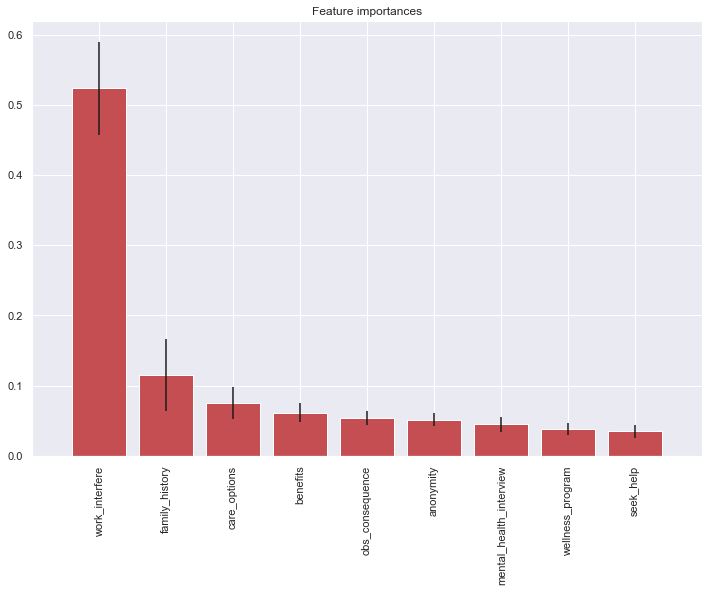

In [53]:
# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


# 9.Tuning
- 9.1)Tuning With Cross Validation Score
- 9.2)Tuning With GridSearch CV
- 9.3)Tuning With RandomizedSearch CV
- 9.4)Tuning With Multiple Parameter


In [54]:
def evalClassModel(model, Y_test, Y_pred_class, plot=False):
    # Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred_class))
    print('Null accuracy:\n', Y_test.value_counts())
    # calculate the percentage of ones
    print('Percentage of ones:', Y_test.mean())
    # calculate the percentage of zeros
    print('Percentage of zeros:', 1-Y_test.mean())
    # Comparing the true and predicted response values
    print('True:', Y_test.values[0:25])
    print('Pred:', Y_pred_class[0:25])

    # Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(Y_test, Y_pred_class)
    # [row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    # visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # Metrics computed from a confusion matrix
    # Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(Y_test, Y_pred_class)
    print('Classification Accuracy:', accuracy)
    # Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 -
          metrics.accuracy_score(Y_test, Y_pred_class))
    # False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    # Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(Y_test, Y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(Y_test, Y_pred_class))
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model,
          X, Y, cv=10, scoring='roc_auc').mean())
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n',
          model.predict_proba(X_test)[0:10])
    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    # store the predicted probabilities for class 1
    Y_pred_prob = model.predict_proba(X_test)[:, 1]
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(Y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    Y_pred_prob = Y_pred_prob.reshape(-1, 1)
    Y_pred_class = binarize(Y_pred_prob)

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', Y_pred_prob[0:10])
    roc_auc = metrics.roc_auc_score(Y_test, Y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange',
                 label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) +
              ' :', 1 - fpr[thresholds > threshold][-1])
    predict_mine = np.where(Y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(Y_test, predict_mine)
    print(confusion)

    return accuracy


9.1.Tuning with cross validation score

In [55]:
def tuningCV(knn):
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_score = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()


9.2. Tuning with GridSearchCV

In [56]:
def tuningGridSearch(knn):
    k_range=list(range(1,31))
    print(k_range)
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid=dict(n_neighbors=k_range)
    print(param_grid)
    grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
    grid.fit(X,Y)
    # view the complete results (list of named tuples)
    grid.grid_scores_
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    # create a list of the mean scores only
    grid_mean_scores=[result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    #plot the results
    plt.plot(k_range,grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    #examine the best model
    print('GridSearch best score',grid.best_score_)
    print('GridSearch best params',grid.best_params_)
    print('GridSearch best estimator',grid.best_estimator_)

9.3.Tuning with RandomizedSearchCV

In [57]:
def tuningRandomizedSearchCV(model, param_dist):
    rand = RandomizedSearchCV(model, param_dist, cv=10,scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, Y)
    # rand.grid_scores_
    # examine the best model
    print('Rand.Best Score:', rand.best_score_)
    print('Rand.Best Params:', rand.best_params_)
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(
            model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
        rand.fit(X, Y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)


9.4.Tuning with searching multiple parameters simultaneously

In [58]:
def tuningMultParam(knn):
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights=weight_option)
    print(param_grid)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, Y)
    print(grid.grid_scores_)
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)


# 10. Modelling
- 10.1)Logistic Regression
- 10.2)KNeighbors Classifier
- 10.3)Decision Tree Classifier
- 10.4)Random Forest Classifier
- 10.5)Bagging
- 10.6)Boosting
- 10.7)Stacking

Create dictionaries for final graph

In [59]:
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

### 10.1) Logistic Regression

########### Logistic Regression ###############
Accuracy: 0.810207336523126
Null accuracy:
 1    335
0    292
Name: treatment, dtype: int64
Percentage of ones: 0.5342902711323764
Percentage of zeros: 0.46570972886762363
True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
Pred: [1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


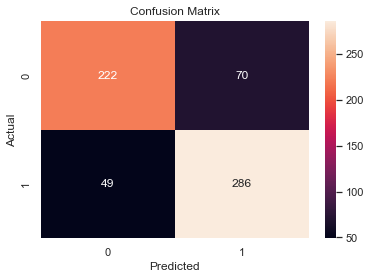

Classification Accuracy: 0.810207336523126
Classification Error: 0.18979266347687396
False Positive Rate: 0.23972602739726026
Precision: 0.8033707865168539
AUC Score: 0.8070026579431611
Cross-validated AUC: 0.8741919482846902
First 10 predicted responses:
 [1 0 1 1 0 1 0 0 1 0]
First 10 predicted probabilities of class members:
 [[0.10172581 0.89827419]
 [0.88038805 0.11961195]
 [0.36450591 0.63549409]
 [0.27119706 0.72880294]
 [0.53910476 0.46089524]
 [0.48399816 0.51600184]
 [0.69447221 0.30552779]
 [0.75361431 0.24638569]
 [0.15432038 0.84567962]
 [0.94518128 0.05481872]]
First 10 predicted probabilities:
 [[0.89827419]
 [0.11961195]
 [0.63549409]
 [0.72880294]
 [0.46089524]
 [0.51600184]
 [0.30552779]
 [0.24638569]
 [0.84567962]
 [0.05481872]]


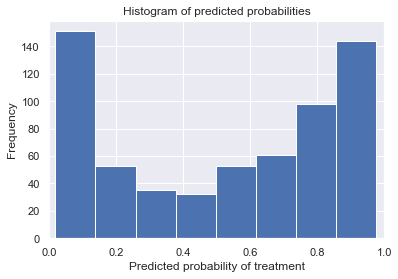

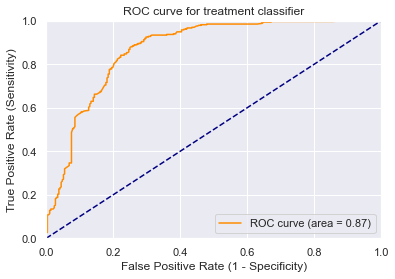

[[222  70]
 [ 49 286]]


In [60]:
def logisticsRegression():
    logreg=LogisticRegression()
    logreg.fit(X_train,Y_train)
    Y_pred_class=logreg.predict(X_test)
    print('########### Logistic Regression ###############')
    accuracy_score = evalClassModel(logreg, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['Log.Regres.']=accuracy_score*100


logisticsRegression()


### 10.2)KNeighbors Classifiers

Rand.Best Score: 0.8283999999999999
Rand.Best Params: {'weights': 'uniform', 'n_neighbors': 15}
[0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828, 0.828]
########### KNeighborsClassifier ###############
Accuracy: 0.79585326953748
Null accuracy:
 1    335
0    292
Name: treatment, dtype: int64
Percentage of ones: 0.5342902711323764
Percentage of zeros: 0.46570972886762363
True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
Pred: [1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1]


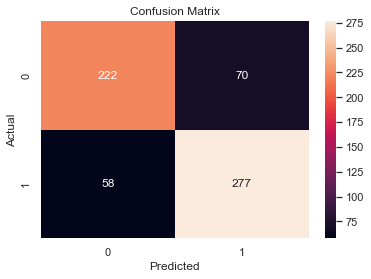

Classification Accuracy: 0.79585326953748
Classification Error: 0.20414673046251997
False Positive Rate: 0.23972602739726026
Precision: 0.7982708933717579
AUC Score: 0.7935698221222655
Cross-validated AUC: 0.88375736047107
First 10 predicted responses:
 [1 0 1 1 1 1 0 0 1 0]
First 10 predicted probabilities of class members:
 [[0.48148148 0.51851852]
 [0.77777778 0.22222222]
 [0.22222222 0.77777778]
 [0.25925926 0.74074074]
 [0.37037037 0.62962963]
 [0.48148148 0.51851852]
 [0.62962963 0.37037037]
 [0.81481481 0.18518519]
 [0.14814815 0.85185185]
 [0.88888889 0.11111111]]
First 10 predicted probabilities:
 [[0.51851852]
 [0.22222222]
 [0.77777778]
 [0.74074074]
 [0.62962963]
 [0.51851852]
 [0.37037037]
 [0.18518519]
 [0.85185185]
 [0.11111111]]


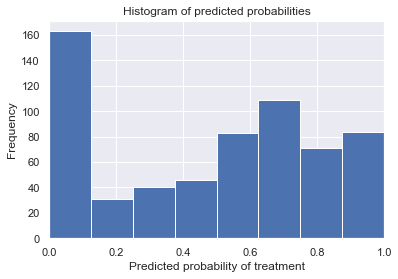

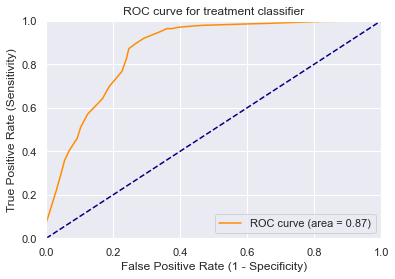

[[222  70]
 [ 58 277]]


In [61]:
def Knn():
    knn = KNeighborsClassifier(n_neighbors=5)
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'disance']
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, Y_train)
    Y_pred_class = knn.predict(X_test)
    print('########### KNeighborsClassifier ###############')
    accuracy_score = evalClassModel(knn, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['KNN'] = accuracy_score * 100

Knn()

### 10.3)Decision Tree classifier

Rand.Best Score: 0.8291999999999999
Rand.Best Params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}
[0.831, 0.829, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831]
########### Tree classifier ###############
Accuracy: 0.8341307814992025
Null accuracy:
 1    335
0    292
Name: treatment, dtype: int64
Percentage of ones: 0.5342902711323764
Percentage of zeros: 0.46570972886762363
True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
Pred: [1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1]


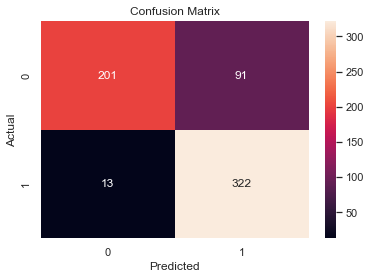

Classification Accuracy: 0.8341307814992025
Classification Error: 0.1658692185007975
False Positive Rate: 0.3116438356164384
Precision: 0.7796610169491526
AUC Score: 0.8247750971171539
Cross-validated AUC: 0.8873307891705069
First 10 predicted responses:
 [1 0 1 1 1 1 1 0 1 0]
First 10 predicted probabilities of class members:
 [[0.17857143 0.82142857]
 [0.89655172 0.10344828]
 [0.38461538 0.61538462]
 [0.06015038 0.93984962]
 [0.06015038 0.93984962]
 [0.44628099 0.55371901]
 [0.17857143 0.82142857]
 [0.65517241 0.34482759]
 [0.17857143 0.82142857]
 [0.89655172 0.10344828]]
First 10 predicted probabilities:
 [[0.82142857]
 [0.10344828]
 [0.61538462]
 [0.93984962]
 [0.93984962]
 [0.55371901]
 [0.82142857]
 [0.34482759]
 [0.82142857]
 [0.10344828]]


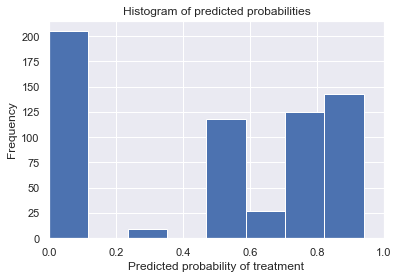

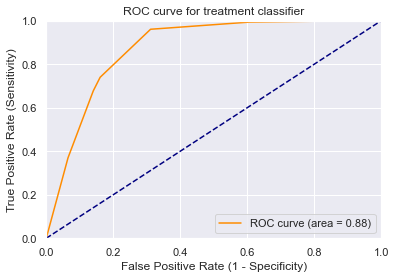

[[201  91]
 [ 13 322]]


In [62]:
def treeClassifier():
    tree = DecisionTreeClassifier()
    featureSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, featureSize),
                  "min_samples_split": randint(2, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(
        max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, Y_train)
    Y_pred_class = tree.predict(X_test)
    print('########### Tree classifier ###############')
    accuracy_score = evalClassModel(tree, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

treeClassifier()

### 10.4) Random Forest Classifier

Rand.Best Score: 0.8315936507936508
Rand.Best Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 8}
[0.833, 0.834, 0.832, 0.831, 0.832, 0.831, 0.831, 0.831, 0.834, 0.835, 0.831, 0.831, 0.833, 0.832, 0.832, 0.832, 0.832, 0.831, 0.831, 0.837]
########### Random Forests ###############
Accuracy: 0.8213716108452951
Null accuracy:
 1    335
0    292
Name: treatment, dtype: int64
Percentage of ones: 0.5342902711323764
Percentage of zeros: 0.46570972886762363
True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
Pred: [1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1]


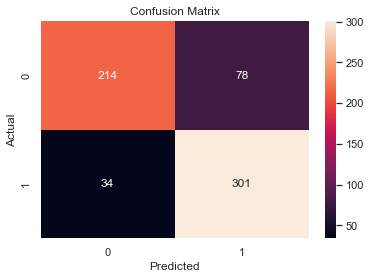

Classification Accuracy: 0.8213716108452951
Classification Error: 0.17862838915470491
False Positive Rate: 0.2671232876712329
Precision: 0.7941952506596306
AUC Score: 0.8156920875076672
Cross-validated AUC: 0.8950428827444956
First 10 predicted responses:
 [1 0 1 1 1 1 1 0 1 0]
First 10 predicted probabilities of class members:
 [[0.32351341 0.67648659]
 [0.86358605 0.13641395]
 [0.40755252 0.59244748]
 [0.44926747 0.55073253]
 [0.23055906 0.76944094]
 [0.32276134 0.67723866]
 [0.26328989 0.73671011]
 [0.63732281 0.36267719]
 [0.13672839 0.86327161]
 [0.8715056  0.1284944 ]]
First 10 predicted probabilities:
 [[0.67648659]
 [0.13641395]
 [0.59244748]
 [0.55073253]
 [0.76944094]
 [0.67723866]
 [0.73671011]
 [0.36267719]
 [0.86327161]
 [0.1284944 ]]


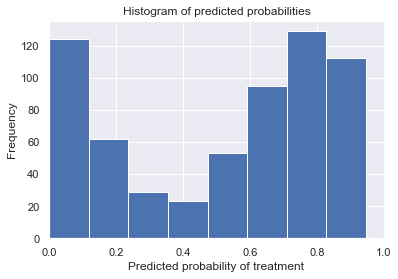

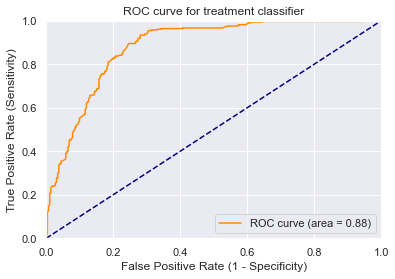

[[214  78]
 [ 34 301]]


In [63]:
def randomForest():
    forest = RandomForestClassifier(n_estimators=20)
    featureSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, featureSize),
                  "min_samples_split": randint(2, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    # Building and fitting my_forest
    forest = RandomForestClassifier(
        max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=20, random_state=1)
    my_forest = forest.fit(X_train, Y_train)
    # make class predictions for the testing set
    Y_pred_class = my_forest.predict(X_test)
    print('########### Random Forests ###############')
    accuracy_score = evalClassModel(my_forest, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

randomForest()

### 10.5)Bagging

########### Bagging ###############
Accuracy: 0.748006379585327
Null accuracy:
 1    335
0    292
Name: treatment, dtype: int64
Percentage of ones: 0.5342902711323764
Percentage of zeros: 0.46570972886762363
True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
Pred: [1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1]


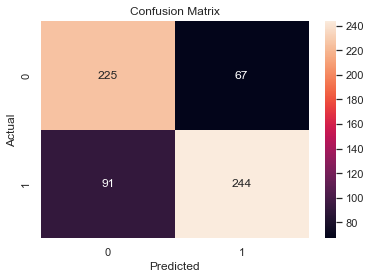

Classification Accuracy: 0.748006379585327
Classification Error: 0.251993620414673
False Positive Rate: 0.22945205479452055
Precision: 0.7845659163987139
AUC Score: 0.7494530770803517
Cross-validated AUC: 0.8519655257936508
First 10 predicted responses:
 [1 0 1 0 1 0 1 1 1 0]
First 10 predicted probabilities of class members:
 [[0.1  0.9 ]
 [0.9  0.1 ]
 [0.04 0.96]
 [0.55 0.45]
 [0.1  0.9 ]
 [0.8  0.2 ]
 [0.   1.  ]
 [0.41 0.59]
 [0.1  0.9 ]
 [1.   0.  ]]
First 10 predicted probabilities:
 [[0.9 ]
 [0.1 ]
 [0.96]
 [0.45]
 [0.9 ]
 [0.2 ]
 [1.  ]
 [0.59]
 [0.9 ]
 [0.  ]]


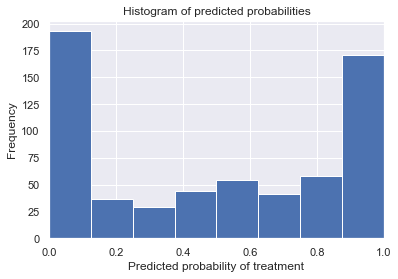

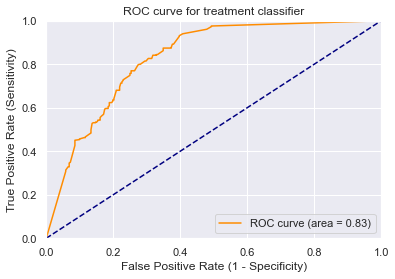

[[225  67]
 [ 91 244]]


In [64]:
def bagging():
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, Y_train)
    Y_pred_class = bag.predict(X_test)
    print('########### Bagging ###############')
    accuracy_score = evalClassModel(bag, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

bagging()

### 10.6)Boosting

########### Boosting ###############
Accuracy: 0.8054226475279107
Null accuracy:
 1    335
0    292
Name: treatment, dtype: int64
Percentage of ones: 0.5342902711323764
Percentage of zeros: 0.46570972886762363
True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
Pred: [1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1]


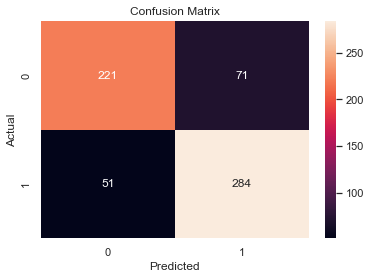

Classification Accuracy: 0.8054226475279107
Classification Error: 0.1945773524720893
False Positive Rate: 0.24315068493150685
Precision: 0.8
AUC Score: 0.802305254549172
Cross-validated AUC: 0.8984447004608296
First 10 predicted responses:
 [1 0 1 0 1 0 1 0 1 0]
First 10 predicted probabilities of class members:
 [[0.49954968 0.50045032]
 [0.50066879 0.49933121]
 [0.4999646  0.5000354 ]
 [0.50004136 0.49995864]
 [0.49933475 0.50066525]
 [0.50010939 0.49989061]
 [0.49931453 0.50068547]
 [0.50037846 0.49962154]
 [0.49971058 0.50028942]
 [0.50090286 0.49909714]]
First 10 predicted probabilities:
 [[0.50045032]
 [0.49933121]
 [0.5000354 ]
 [0.49995864]
 [0.50066525]
 [0.49989061]
 [0.50068547]
 [0.49962154]
 [0.50028942]
 [0.49909714]]


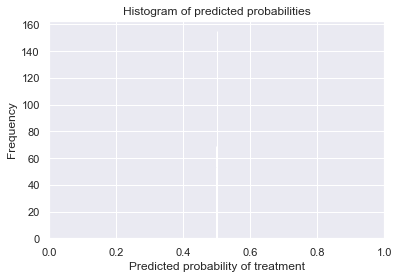

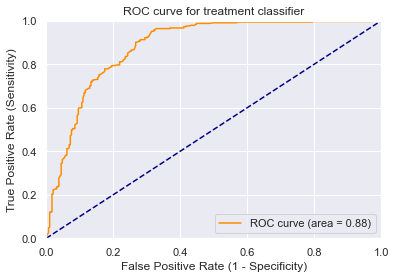

[[221  71]
 [ 51 284]]


In [65]:
def boosting():
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=800)
    boost.fit(X_train, Y_train)
    Y_pred_class = boost.predict(X_test)
    print('########### Boosting ###############')
    accuracy_score = evalClassModel(boost, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

boosting()

### 10.7)Stacking

########### Stacking ###############
Accuracy: 0.7814992025518341
Null accuracy:
 1    335
0    292
Name: treatment, dtype: int64
Percentage of ones: 0.5342902711323764
Percentage of zeros: 0.46570972886762363
True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
Pred: [1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1]


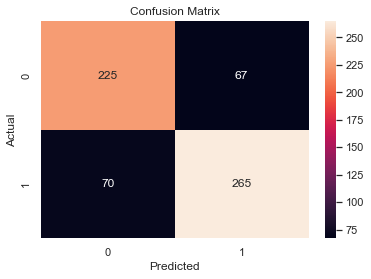

Classification Accuracy: 0.7814992025518341
Classification Error: 0.21850079744816586
False Positive Rate: 0.22945205479452055
Precision: 0.7981927710843374
AUC Score: 0.7807963606624411
Cross-validated AUC: 0.8504566292242703
First 10 predicted responses:
 [1 0 1 1 1 0 1 0 1 0]
First 10 predicted probabilities of class members:
 [[0.03519598 0.96480402]
 [0.96775998 0.03224002]
 [0.03519598 0.96480402]
 [0.03519598 0.96480402]
 [0.07262747 0.92737253]
 [0.93325472 0.06674528]
 [0.07262747 0.92737253]
 [0.60335461 0.39664539]
 [0.03519598 0.96480402]
 [0.96775998 0.03224002]]
First 10 predicted probabilities:
 [[0.96480402]
 [0.03224002]
 [0.96480402]
 [0.96480402]
 [0.92737253]
 [0.06674528]
 [0.92737253]
 [0.39664539]
 [0.96480402]
 [0.03224002]]


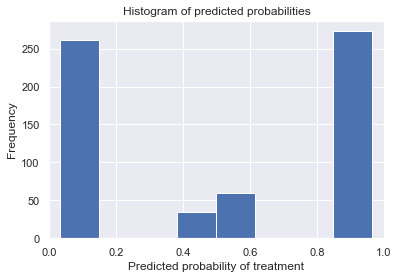

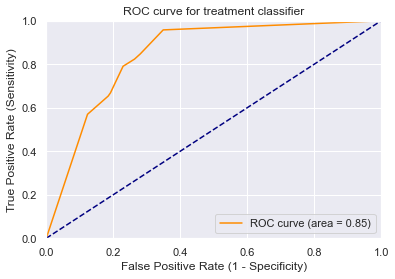

[[225  67]
 [ 70 265]]


In [66]:
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier


def stacking():
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(
        classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, Y_train)
    Y_pred_class = stack.predict(X_test)
    print('########### Stacking ###############')
    accuracy_score = evalClassModel(stack, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['Stacking'] = accuracy_score * 100

stacking()

# 11.Predict With Neural Network
- 11.1)Create input functions to supply data for training, evaluating, and prediction.
- 11.2)Instantiate an Estimator
- 11.3)Train,Evaluate,Predict

### 11.1.Create input functions to supply data for training, evaluating, and prediction.

In [67]:
import tensorflow as tf
import argparse

batch_size = 100
train_shape = 1000

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5,random_state=42)
# An input function for training


def train_input(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    return dataset.shuffle(1000).repeat().batch(batch_size)
# An input function for evaluation or prediction


def eval_input(features, labels, batch_size):
    features = dict(features)
    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    # Batch the examples
    assert batch_size is not None, "batchsize must not be None"
    dataset = dataset.batch(batch_size)
    return dataset


In [68]:
# Define Tensorflow feature columns

work_interfere = tf.feature_column.numeric_column("work_interfere")
family_history = tf.feature_column.numeric_column("family_history")
care_options = tf.feature_column.numeric_column("care_options")
benefits = tf.feature_column.numeric_column("benefits")
obs_consequence = tf.feature_column.numeric_column("obs_consequence")
anonymity = tf.feature_column.numeric_column("anonymity")
mental_health_interview = tf.feature_column.numeric_column("mental_health_interview")
wellness_program = tf.feature_column.numeric_column("wellness_program")
seek_help = tf.feature_column.numeric_column("seek_help")

feature_columns = [work_interfere,family_history,care_options,benefits,obs_consequence,anonymity,mental_health_interview,wellness_program,seek_help]

In [69]:
# For disable the V2 behavior
import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

### 11.2.Instantiate an Estimator
Our problem is a classic classification problem. We want to predict whether a patient has to be treated or not. We'll use tf.estimator.DNNClassifier for deep models that perform multi-class classification.

In [70]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                   hidden_units=[10, 10],
                                   optimizer=tf.train.ProximalAdagradOptimizer(learning_rate=0.03,
                                                                               l1_regularization_strength=0.001))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\KIIT\\AppData\\Local\\Temp\\tmpjxem2iz2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### 11.3.Train, Evaluate, and Predict
Now that we have an Estimator object, we can call methods to do the following:

- Train the model.
- Evaluate the trained model.
- Use the trained model to make predictions.

In [71]:
# 10.3.1 Train the model
model.train(input_fn=lambda:train_input(X_train, Y_train, batch_size), steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\KIIT\AppData\Local\Temp\tmpjxem2iz2\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 74.753105, step = 0
INFO:tensorflow:global_step/sec: 303.362
INFO:tensorflow:loss = 36.74939, step = 100 (0.331 sec)
INFO:tensorflow:global_step/sec: 911.518
INFO:tensorflow:loss = 32.91946, step = 200 (0.109 sec)
INFO:tensorflow:global_step/sec: 945.882
INFO:tensorflow:loss = 31.408907, step = 300 (0.106 sec)
INFO:tensorflow:global_st

Evaluate the trained model<br>
Now that the model has been trained, we can get some statistics on its performance. The following code block evaluates the accuracy of the trained model on the test data.

In [72]:
#10.3.2.Evaluate the model
eval_result=model.evaluate(input_fn=lambda:eval_input(X_test,Y_test,batch_size))
print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))
#Data for final graph
accuracy=eval_result['accuracy']*100
methodDict['NN NNClasif.']=accuracy

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-04-28T00:13:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KIIT\AppData\Local\Temp\tmpjxem2iz2\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.02680s
INFO:tensorflow:Finished evaluation at 2023-04-28-00:13:52
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8213716, accuracy_baseline = 0.53429025, auc = 0.877985, auc_precision_recall = 0.8671571, average_loss = 0.42147657, global_step = 1000, label/mean = 0.53429025, loss = 37.75226, precision = 0.79419523, prediction/mean = 0.5179079, recall = 0.8985075
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users

In [73]:
#10.3.3.Making predictions (inferring) from the trained model
predictions = list(model.predict(input_fn=lambda:eval_input(X_train, Y_train, batch_size=1000)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KIIT\AppData\Local\Temp\tmpjxem2iz2\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


# 12.Modelling Success Method Plot


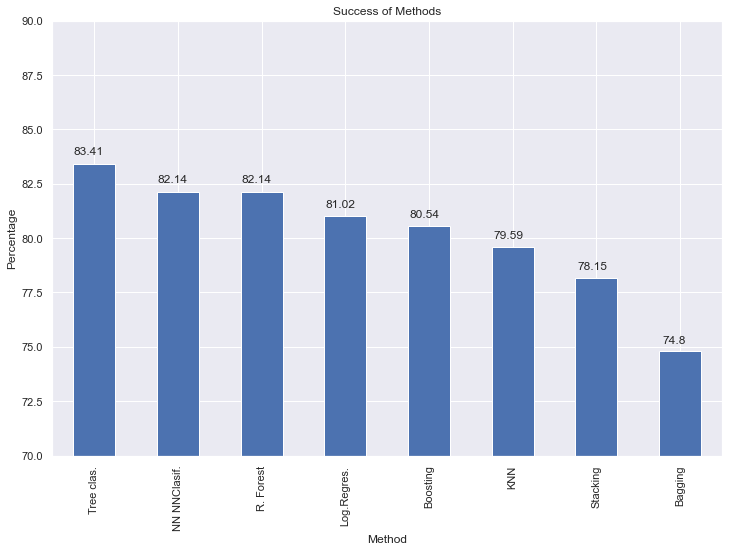

In [74]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)),
                    (p.get_x()*1.005, p.get_height()*1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of Methods')
    plt.show()

plotSuccess()

### As we can see,after modelling our best fit model is Decision Tree Classifier  with Accuracy 83.41%<br>
### So,now we will perform Optuna Hyperparameter Tuning by using this  model and calculate the final result & accuracy

# 13.Optuna Hyperparameter Tuning

In [75]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def objective(trial):
    
    X = df[feature_cols]
    Y = df.treatment

    # Split data into training and validation sets
    X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.5,random_state=42)

    # Define hyperparameters to optimize
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])

    # Create decision tree classifier with hyperparameters
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
    )

    # Fit the classifier on training data
    clf.fit(X_train, Y_train)

    # Predict on validation data
    Y_pred = clf.predict(X_test)

    # Calculate accuracy score
    accuracy =round(accuracy_score(Y_test, Y_pred)*100)

    return accuracy


if __name__ == "__main__":
    # Create an Optuna study
    study = optuna.create_study(direction="maximize")

    # Optimize hyperparameters for 100 trials
    study.optimize(objective, n_trials=100)

    # Print the best hyperparameters and accuracy score
    print("Best hyperparameters: ", study.best_params)
    print("Best accuracy: ", study.best_value)


[I 2023-04-28 00:13:54,329] A new study created in memory with name: no-name-fe1d5a98-158d-4b87-a057-fd7012cbcd10
[I 2023-04-28 00:13:54,340] Trial 0 finished with value: 78.0 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 78.0.
[I 2023-04-28 00:13:54,348] Trial 1 finished with value: 79.0 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 1 with value: 79.0.
[I 2023-04-28 00:13:54,357] Trial 2 finished with value: 83.0 and parameters: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 2 with value: 83.0.
[I 2023-04-28 00:13:54,365] Trial 3 finished with value: 77.0 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 2 with value: 83.0.
[I 2023-04-28 00:13:54,377] Trial 4 finished with value: 79.0 and parameters: {'max_

Best hyperparameters:  {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'gini'}
Best accuracy:  83.0


In [76]:
optuna.visualization.plot_optimization_history(study)

In [77]:
optuna.visualization.plot_slice(study)

########### Tree classifier ###############
Accuracy: 0.8341307814992025
Null accuracy:
 1    335
0    292
Name: treatment, dtype: int64
Percentage of ones: 0.5342902711323764
Percentage of zeros: 0.46570972886762363
True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
Pred: [1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1]


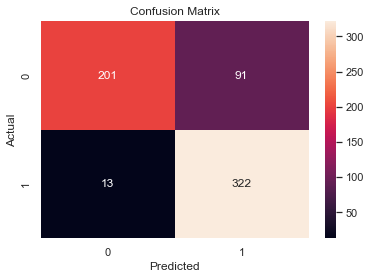

Classification Accuracy: 0.8341307814992025
Classification Error: 0.1658692185007975
False Positive Rate: 0.3116438356164384
Precision: 0.7796610169491526
AUC Score: 0.8247750971171539
Cross-validated AUC: 0.8638508864567334
First 10 predicted responses:
 [1 0 1 1 1 1 1 0 1 0]
First 10 predicted probabilities of class members:
 [[0.35353535 0.64646465]
 [0.8362069  0.1637931 ]
 [0.35353535 0.64646465]
 [0.35353535 0.64646465]
 [0.35353535 0.64646465]
 [0.10240964 0.89759036]
 [0.35353535 0.64646465]
 [0.8362069  0.1637931 ]
 [0.10240964 0.89759036]
 [0.8362069  0.1637931 ]]
First 10 predicted probabilities:
 [[0.64646465]
 [0.1637931 ]
 [0.64646465]
 [0.64646465]
 [0.64646465]
 [0.89759036]
 [0.64646465]
 [0.1637931 ]
 [0.89759036]
 [0.1637931 ]]


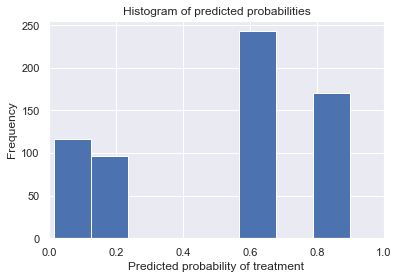

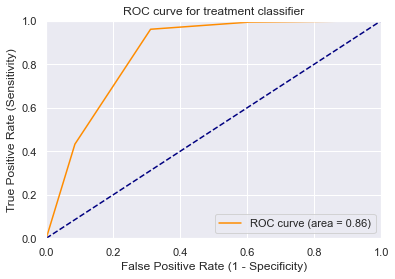

[[201  91]
 [ 13 322]]


In [78]:
def treeClassifier():
    tree = DecisionTreeClassifier()
    featureSize = feature_cols.__len__()
    # param_dist = {"max_depth": [3, None],
    #               "max_features": randint(1, featureSize),
    #               "min_samples_split": randint(2, 9),
    #               "min_samples_leaf": randint(1, 9),
    #               "criterion": ["gini", "entropy"]}
    # tuningRandomizedSearchCV(tree, param_dist)
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=2, min_samples_split=7, criterion='entropy', min_samples_leaf=6)
    tree.fit(X_train, Y_train)
    Y_pred_class = tree.predict(X_test)
    print('########### Tree classifier ###############')
    accuracy_score = evalClassModel(tree, Y_test, Y_pred_class, True)
    # Data for final graph
    # methodDict['Tree clas.'] = accuracy_score * 100

treeClassifier()

# 14.Generate Predictions from the model

In [79]:
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

col1 = []
col2 = []
col3 = []

for idx, input, p in zip(X_train.index, Y_train, predictions):
    v = p["class_ids"][0]
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id]  # Probability

    # Adding to dataframe
    col1.append(idx)  # index
    col2.append(v)  # Prediction
    col3.append(input)  # Expecter

results = pd.DataFrame({'INDEX': col1, 'PREDICTION': col2, 'EXPECTED': col3})
results.head()


,INDEX,PREDICTION,EXPECTED
0,408,0,0
1,731,0,0
2,507,1,1
3,969,1,1
4,504,1,1


# 15.Creating predictions on test set

In [80]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, Y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
results = pd.DataFrame({'INDEX': X_test.index, 'TREATMENT': dfTestPredictions})

# save to file
results.to_csv('E:\\6.My Project\\8th Sem Prj\\ML Part\\Final_Results.csv', index=False)
results.head()


,INDEX,TREATMENT
0,721,1
1,1246,0
2,1071,1
3,925,1
4,1111,1


### 16.PICKLE PART

STORE THE FINAL RESULT INTO A PICKLE FILE

In [81]:
# import pickle as pk
# pk.dump(results,open('Final_Results.pkl','wb'))

STORE THE FINAL MODEL INTO A PICKLE FILE

In [82]:
# import pickle
# pickle.dump (treeClassifier, open ('Final_Model.pkl','wb'))

In [83]:
# import pickle

# # train and fit your model on the data
# model = DecisionTreeClassifier()
# model.fit(X_train,Y_train)

# # save the trained model as a pickle file
# with open('Final_Model_DTC.pkl', 'wb') as f:
#     pickle.dump(model, f)


STORE THE ENCODER MODEL INTO A PICKLE FILE

In [84]:
# from sklearn.preprocessing import OneHotEncoder
# import pickle

# # Create an instance of OneHotEncoder
# encoder = OneHotEncoder()

# # Fit the encoder to some data

# encoder.fit(X_train,Y_train)

# # Save the encoder as a pickle file
# with open('Encoder.pkl', 'wb') as f:
#     pickle.dump(encoder, f)


STORE THE SCALER MODEL INTO A PICKLE FILE

In [85]:
# from sklearn.preprocessing import StandardScaler
# import pickle

# # Create an instance of StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to some data
# scaler.fit(X_train,Y_train)

# # Save the scaler as a pickle file
# with open('Scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pickle
encoder = OneHotEncoder()
encoder.fit(X_train, Y_train)
# Assume encoder is a trained encoder object
with open('Final_Encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


********************************************************************************** END **********************************************************************************